# Computing the Riemann Constant Vector

This iPython notebook contains the example code presented in the paper [Computing the Riemann Constant Vector](http://www.cswiercz.info/assets/files/rcv.pdf) by Bernard Deconinck, Matthew S. Patterson, and Chris Swierczewski.

First, we construct the Riemann surface, $X$, defined by the plane algebraic curve

$$
f(x,y) = x^2 y^3 - x^4 + 1.
$$

We computationally determine its genus as well as a basis $\{\tilde{\omega}_1, \ldots, \tilde{\omega}_g\}$ of Abelian differentials of the first kind, $\Omega_X^1$, defined on the surface $X$.

In [1]:
from sympy.abc import x,y
from abelfunctions import (RiemannSurface, RiemannTheta, Jacobian,
                           AbelMap, RiemannConstantVector, puiseux)

f = x**2*y**3 - x**4 + 1
X = RiemannSurface(f,x,y)
g = X.genus()
omega = X.holomorphic_differentials()

print 'differentials:'
for omegai in omega:
    print omegai
print 'genus:', g

differentials:
1/3*x**2*y**2
x/3*x**2*y**2
x*y/3*x**2*y**2
x**2/3*x**2*y**2
genus: 4


Next, we compute a canonical basis of cycles $\{a_1, \ldots, a_g, b_1, \ldots, b_g\}$ of the first homology group $H_1(X, \mathbb{Z})$. That is, every cycle on $X$ can be written as a linear combination of these cycles.

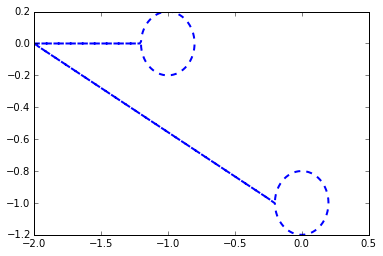

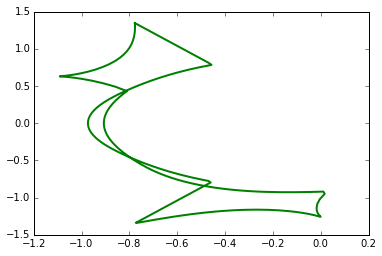

In [2]:
%matplotlib inline

a = X.a_cycles()
b = X.b_cycles()

# use 256 points to plot the x- and y-parts of the path
figx = a[0].plot_x(256, color='blue', linewidth=2, linestyle='dashed')
figy = a[0].plot_y(256, color='green', linewidth=2)

Using these data we can compute the period matrix of the surface:

$$
\tau = [A \; B] \in \mathbb{C}^{g \times 2g}
$$

where

$$
A_{ij} = \oint_{a_j} \tilde{\omega}_i, \quad \text{and} \quad B_{ij} = \oint_{a_j} \tilde{\omega}_i
$$

If using a *normalized* basis of differentials, $\{\omega_1, \ldots, \omega_g\}$, the period matrix is of the form

$$
\tau = [I \; \Omega] \in \mathbb{C}^{g \times 2g}.
$$

This is equivalent to setting $\Omega = A^{-1}B$ and, in fact, since Abelfunctions returns a non-normalized basis this is how the matrix $\Omega$ is computed. We computationally verify that $\Omega$ is a "Riemann matrix": a symmetric matrix with positive definite imaginary part.

In [3]:
# for brevity, we only print the first four significant digits
import numpy
numpy.set_printoptions(precision=4, suppress=True)

tau = X.period_matrix()
A = tau[:g,:g]
B = tau[:g,g:]
Omega = X.riemann_matrix() # returns A**(-1)*B

print A
print
print B
print
print Omega

[[ 0.2800+1.045j   0.2800-0.485j  -1.8100+1.045j   0.0000-0.j    ]
 [ 0.6625-1.1475j  0.6625+0.3825j -0.6625-1.1475j  0.0000+1.53j  ]
 [-0.8347+0.4819j -0.8347+0.4819j  0.8347-1.4457j  0.0000+1.9276j]
 [-1.0450+0.28j   -1.0450+1.81j   -0.4850+0.28j    0.0000+0.j    ]]

[[-0.2800+0.485j   0.2800-1.045j   0.0000-2.09j    0.7650-1.325j ]
 [ 0.6625+0.3825j -0.6625+0.3825j  0.0000-0.765j   0.0000-1.53j  ]
 [-0.8347+0.4819j  0.8347-1.4457j  0.0000-0.9638j -1.6694-0.9638j]
 [ 1.0450-1.81j   -1.0450-0.28j   -0.0000-0.56j    0.7650-1.325j ]]

[[ 0.3934+0.795j  -0.7541-0.3691j -0.4426-0.0284j  0.2049+0.2697j]
 [-0.7541-0.3691j  0.2787+0.8518j  0.0984+0.1988j -0.4344-0.1562j]
 [-0.4426-0.0284j  0.0984+0.1988j -0.3770+0.6815j -0.9180+0.4543j]
 [ 0.2049+0.2697j -0.4344-0.1562j -0.9180+0.4543j -1.2787+0.8802j]]


In [4]:
symmetric_error = numpy.linalg.norm(Omega - Omega.T)
imag_part_evals = numpy.linalg.eigvals(Omega.imag)

print 'error:', symmetric_error
print 'evals:', imag_part_evals

error: 3.54420172099e-10
evals: [ 1.4038  1.1654  0.4294  0.21  ]


## Places and Divisors

Places $P \in X$ are represented using a Puiseux series. If $x$ and $y$ are the affine coordinates of the underlying curve $f$ then we write

$$
P =
\begin{cases}
x(t) = \alpha + \lambda t^e \\
y(t) = \sum_i \beta_i t^{n_i}
\end{cases}
$$

In the case when $e = 1$ (an "unramified place") and $x \neq \infty$ a place is synonymous with a tuple $(\alpha, \beta) \in \mathbb{C}^2$ such that $f(\alpha, \beta) = 0$.

A divisor $\mathcal{D}$ is a *formal sum* of places, $\mathcal{D} = \sum_i n_i P_i$, where each of the $n_i$ are the *multiplicities* of the places $P_i$ in the divisor. Below we compute local representation of several places on the Riemann surface and construct some divisors from them.

In [5]:
places_above_zero = X(0)
print places_above_zero

[(-t**3, -1/t**2 + O(1))]


In [6]:
print 'Places:'
places_above_two = X(2)
for P in places_above_two:
    print P
    
print 'Puiseux:'
series_at_two = puiseux(f,x,y,2)
for p in series_at_two:
    print p 

Places:
(2, RootOf(4*_y**3 - 15, 0))
(2, RootOf(4*_y**3 - 15, 1))
(2, RootOf(4*_y**3 - 15, 2))
Puiseux:
(t + 2, RootOf(4*_y**3 - 15, 0) + O(t**2))
(t + 2, RootOf(4*_y**3 - 15, 1) + O(t**2))
(t + 2, RootOf(4*_y**3 - 15, 2) + O(t**2))


In [7]:
P = places_above_zero[0]
Q = places_above_two[0]
D = 3*P + Q

print 'Divisor:', D
print 'Degree:', D.degree

Divisor: (2, RootOf(4*_y**3 - 15, 0)) + 3(-t**3, -1/t**2 + O(1))
Degree: 4


In [8]:
D2 = sum(places_above_two)
print D2

(2, RootOf(4*_y**3 - 15, 0)) + (2, RootOf(4*_y**3 - 15, 2)) + (2, RootOf(4*_y**3 - 15, 1))


## The Abel Map

Given a fixed *base place* $P_0 \in X$, the Abel Map $A : X \to J(X)$ is defined

$$
A(P) = \left( \int_{P_0}^P \omega_1, \ldots, \int_{P_0}^P \omega_g \right)
$$

where the path of integration from $P_0$ to $P$ is the same for each Abelian differential of the first kind. The Abel map is linear over divisors. That is, if $\mathcal{D} = \sum_i n_iP_i$ then

$$
A(\mathcal{D}) = \sum_i n_i A(P_i).
$$

When we want to change or make the back point explicit we write $A(P_0,\mathcal{D})$. Below we evaluate the Abel map at the places and divisors constructed above.

In [9]:
J = Jacobian(X)   # reduces vectors modulo lattice ZZ^g + Omega ZZ^g
z1 = AbelMap(P)   # Abel map from P0 to P
z2 = AbelMap(Q)   # Abel map from P0 to Q
z3 = AbelMap(P,Q) # Abel map from P to Q
print z1
print z2
print z3

# numerically verify that A(P,Q) = A(P0,Q) - A(P0,P)
print numpy.linalg.norm( J((z2-z1) - z3) )

[-0.5261+0.0864j  0.0669+0.6392j -0.7495+1.1037j -1.5030+1.0356j]
[-0.3875+0.1157j -0.0290+0.4437j -0.4532+0.7774j -0.9721+0.6732j]
[ 0.1468-0.0985j  0.8467+0.6989j  0.0996+1.0083j -1.1003+0.8159j]
6.48145569903e-16


In [10]:
w = AbelMap(D)
print w

# verify that w = 3*z1 + z2 mod period lattice
z = J(3*z1 + z2)
print numpy.linalg.norm(w-z)

[ 0.0670-0.1361j  0.9421+0.7429j -0.4887+0.7663j -1.5057+0.6992j]
1.3608726004e-15


## Canonical and Valuation Divisors

Let $P = (x(t), y(t))$ be the Puiseux series representation of a place $P \in X$. Given a meromorphic differential $\nu$ we can write the "localization of $\nu$ at $P$" as a Laurent series in the local parameter $t$:

$$
\nu\big|_P = (ct^n + \cdots) dt.
$$

Then the "valuation" of $\nu$ at $P$ is

$$
\text{val}(\nu,P) = n.
$$

The **valuation divisor** $(\nu) \in \text{Div}(X)$ of $\nu$ is the divisor

$$
(\nu) = \sum_{P \in X} \text{val}(\nu,P) P.
$$

A divisor is **canonical** if and only if it's the valuation divisor of a *holomorphic* differential on $X$. All canonical divisors are of degree $2g-2$. Below, we compute a canonical divisor for each holmomrphic differential basis element $\tilde{\omega}_i$ and verify that their degree is $6$.

In [11]:
C0 = omega[0].valuation_divisor()
for place,multiplicity in C0:
    print multiplicity, place
print 'Degree:', C0.degree

6 (t**(-3), t**(-2) + O(1))
Degree: 6


In [12]:
C1 = omega[1].valuation_divisor()
for place,multiplicity in C1:
    print multiplicity, place   
print 'Degree:', C1.degree

3 (-t**3, -1/t**2 + O(1))
3 (t**(-3), t**(-2) + O(1))
Degree: 6


In [13]:
C2 = omega[2].valuation_divisor()
for place,multiplicity in C2:
    print multiplicity, place
print 'Degree:', C2.degree

1 (t**3/4 + 1, t + O(t**3))
1 (-t**3*RootOf(_x**2 + 1, 0)/4 + RootOf(_x**2 + 1, 0), t + O(t**3))
1 (-t**3/4 - 1, t + O(t**3))
1 (t**(-3), t**(-2) + O(1))
1 (-t**3, -1/t**2 + O(1))
1 (-t**3*RootOf(_x**2 + 1, 1)/4 + RootOf(_x**2 + 1, 1), t + O(t**3))
Degree: 6


In [14]:
C3 = omega[3].valuation_divisor()
for place,multiplicity in C3:
    print multiplicity, place
print 'Degree:', C3.degree

6 (-t**3, -1/t**2 + O(1))
Degree: 6


## Riemann Constant Vector

The Riemann constant vector satisfies the following two theorems:

**Theorem 1:** $\mathcal{C}$ is a canonical divisor if any only if $K(P_0) \equiv -A(P_0,\mathcal{C})$.

**Theorem 2:** $\theta(W,\Omega) = 0$ if and only if $W = A(P_0,\mathcal{D}) + K(P_0)$ where $\mathcal{D}$ is a degree $g-1$ divisor.

We compute $K$ below and verify that these two theorems are satisfied.

In [15]:
K = RiemannConstantVector # alias the RCV function for brevity
P0 = X.base_place()
print K(P0)

[ 0.8488+0.7203j -0.5941-0.1146j -0.7432+0.8913j -0.8189+1.1381j]


In [16]:
z = J(2*K(P0) + AbelMap(C3))
print z

[ 0.+0.j -0.+0.j -0.+0.j  0.+0.j]


In [17]:
W = K(P0)
v = RiemannTheta.oscillatory_part(W,Omega)
print abs(v)

2.59621137233e-08


In [18]:
D = sum(places_above_two)
W = J(AbelMap(D) + K(P0))
v = RiemannTheta.oscillatory_part(W, Omega)
print abs(v)

9.39107997133e-10


Additional Code
===============

The following code generates Figure 1 in the paper "Computing the Riemann Constant Vector".

In [19]:
import matplotlib.pyplot as plt
from abelfunctions.riemann_constant_vector import initialize_half_lattice_vectors

In [20]:
h = initialize_half_lattice_vectors(X)
V = 0.5*AbelMap(C3)

oscillatory_parts = [
    RiemannTheta.oscillatory_part(J(hi.T-V),Omega)
    for hi in h
]
oscillatory_magnitudes = sorted(map(abs,oscillatory_parts))

/Users/cswiercz/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


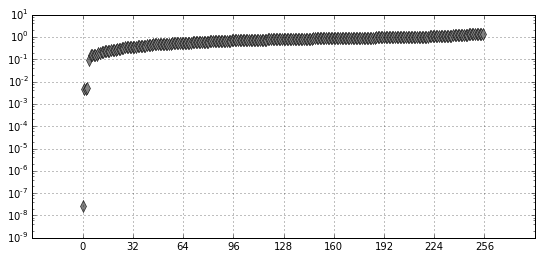

In [21]:
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
ax.semilogy(range(256), oscillatory_magnitudes,
            linestyle='', marker='d',markerfacecolor='grey',markersize=8)
ax.axis([-32,256+32,1e-9,10])
ax.set_xticks([-32] + [32*k for k in range(10)])
ax.set_xticklabels([''] + [str(32*k) for k in range(9)] + [''])
ax.grid(True)
fig.set_figwidth(9)
fig.set_figheight(4)

fig.show()